# AlexNet model

### AlexNet with only 2 categories (Benign and Malign)

## Get packages

In [16]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import albumentations as A
import cv2

from skimage.io import imread
from skimage.io import imshow
from skimage.util import crop
from skimage.transform import resize
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
     

## Paths

In [17]:
TRAIN_PATH = 'archive/classification/simple/train'
TEST_PATH = 'archive/classification/simple/test'
VALID_PATH = 'archive/classification/simple/validate'

In [18]:
input_size = (3,227,227)

## Load and Prepare Images

In [19]:
from keras.preprocessing.image import ImageDataGenerator

# train_batchsize = 4
# valid_batchsize = 4

train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=0.6)

validation_datagen = ImageDataGenerator()
                                  

train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,  
        shuffle=True,
#          batch_size=train_batchsize,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        VALID_PATH,  
        target_size=input_size[1:],
        shuffle=True,
#          batch_size=valid_batchsize,
        class_mode='categorical')


Found 260 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


## Make the model

In [73]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.25))

# 2nd Fully Connected Layer
model.add(Dense(100))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))

# 3rd Fully Connected Layer
model.add(Dense(50))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(
#               loss=keras.losses.CategoricalCrossentropy(),
              loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.legacy.Adamax(), 
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 54, 54, 32)        11648     
                                                                 
 activation_117 (Activation  (None, 54, 54, 32)        0         
 )                                                               
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 17, 17, 64)        247872    
                                                                 
 activation_118 (Activation  (None, 17, 17, 64)        0         
 )                                                               
                                                     

In [6]:
train_generator.class_indices

{'benign': 0, 'malign': 1}

## Train the model

In [76]:
# Se antreneaza modelul
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model1_alexnet_simple.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    checkpoiter

]

results = model.fit(train_generator, 
                    validation_data=validation_generator, 
#                       validation_split=0.1, 
                    batch_size=64, 
                    epochs=25, 
                    callbacks=callbacks,
#                     steps_per_epoch=10
                   )

Epoch 1/25
9/9 [==============================] - ETA: 0s - loss: 0.4738 - accuracy: 0.8269
Epoch 1: val_loss improved from inf to 0.44703, saving model to model1_alexnet_simple.h5
9/9 [==============================] - 3s 290ms/step - loss: 0.4738 - accuracy: 0.8269 - val_loss: 0.4470 - val_accuracy: 0.8161
Epoch 2/25
9/9 [==============================] - ETA: 0s - loss: 0.4915 - accuracy: 0.8269
Epoch 2: val_loss did not improve from 0.44703
9/9 [==============================] - 3s 267ms/step - loss: 0.4915 - accuracy: 0.8269 - val_loss: 0.4601 - val_accuracy: 0.8161
Epoch 3/25
9/9 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.8269
Epoch 3: val_loss did not improve from 0.44703
9/9 [==============================] - 3s 270ms/step - loss: 0.4180 - accuracy: 0.8269 - val_loss: 0.5010 - val_accuracy: 0.8161
Epoch 4/25
9/9 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.8269
Epoch 4: val_loss improved from 0.44703 to 0.42144, saving mod

## Results

In [77]:
print('Accuracy Score = ',np.max(results.history['val_accuracy']))
print('Loss Score = ',np.min(results.history['val_loss']))

Accuracy Score =  0.8160919547080994
Loss Score =  0.4214431643486023


### During training

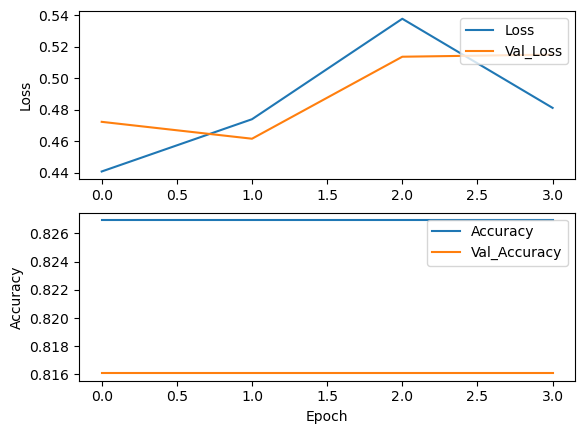

In [11]:
plt.figure()
plt.subplot(211)
loss_train_curve = results.history["loss"]
loss_val_curve = results.history["val_loss"]
plt.plot(loss_train_curve, label = "Loss")
plt.plot(loss_val_curve, label = "Val_Loss")
plt.legend(loc = 'upper right')
plt.ylabel("Loss")


plt.subplot(212)
acc_train_curve = results.history["accuracy"]
acc_val_curve = results.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Accuracy")
plt.plot(acc_val_curve, label = "Val_Accuracy")
plt.legend(loc = 'upper right')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

## Test the model

In [12]:
# test_batch_size = 1

# num_of_test_samples = 1

target_names = list(train_generator.class_indices.keys())
print(target_names)
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=input_size[1:],
#     batch_size=test_batchsize,
    shuffle=True,
class_mode='categorical')

['benign', 'malign']
Found 16 images belonging to 2 classes.


### Make prediction

1/1 [==============================] - 0s 70ms/step


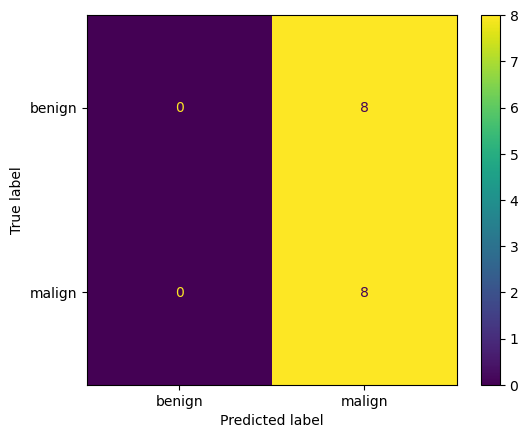

In [15]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
# print(validation_generator.batch_size)

predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Y_pred = model.predict(test_generator, num_of_test_samples // test_batch_size+1)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.grid(False)
plt.show()